## Setup inicial

In [23]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib --user pandas

## Importação dos dados

Baixe o CSV do dataset [AQUI](https://data.brasil.io/dataset/covid19/caso_full.csv.gz). 

Para a leitura dos dados, usaremos a função [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) do Pandas, passando como argumento o caminho relativo para o CSV que baixamos.

Com o método [`head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) podemos ver as primeiras linhas de nosso dataset.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("caso_full.csv")
df.head(10)

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0
5,NaN,35.0,2020-02-27,9,45919049.0,False,False,1,0.00218,2020-02-27,0.0,0,3,state,SP,0,0
6,São Paulo,3550308.0,2020-02-28,9,12252023.0,False,False,2,0.01632,2020-02-28,0.0,0,4,city,SP,1,0
7,NaN,35.0,2020-02-28,9,45919049.0,False,False,2,0.00436,2020-02-28,0.0,0,4,state,SP,1,0
8,São Paulo,3550308.0,2020-02-29,9,12252023.0,False,False,2,0.01632,2020-02-29,0.0,0,5,city,SP,0,0
9,NaN,35.0,2020-02-29,9,45919049.0,False,False,2,0.00436,2020-02-29,0.0,0,5,state,SP,0,0


* **city:** nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).
* **city_ibge_code:** código IBGE do local.
* **date:** data de coleta dos dados no formato YYYY-MM-DD.
* **epidemiological_week:** número da semana epidemiológica.
* **estimated_population_2019:** população estimada para esse município/estado em 2019, segundo o IBGE (acesse o script que faz o download e conversão dos dados de população).
* **is_last:** campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).
* **is_repeated:** campo pré-computado que diz se as informações nesse registro foram publicadas pela Secretaria Estadual de Saúde no dia date ou se o dado é repetido do último dia em que o dado está disponível (igual ou anterior a date). Isso ocorre pois nem todas as secretarias publicam boletins todos os dias. Veja também o campo last_available_date.
* **last_available_confirmed:** número de casos confirmados do último dia disponível igual ou anterior à data date.
* **last_available_confirmed_per_100k_inhabitants:** número de casos confirmados por 100.000 habitantes do último dia disponível igual ou anterior à data date.
* **last_available_date:** data da qual o dado se refere.
* **last_available_death_rate:** taxa de mortalidade (mortes / confirmados) do último dia disponível igual ou anterior à data date.
* **last_available_deaths:** número de mortes do último dia disponível igual ou anterior à data date.
* **order_for_place:** número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.
* **place_type:** tipo de local que esse registro descreve, pode ser city ou state.
* **state:** sigla da unidade federativa, exemplo: SP.
* **new_confirmed:** número de novos casos confirmados desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).
* **new_deaths:** número de novos óbitos desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).

## Limpeza do dataset

Sem dúvida o passo mais importante para a visualização de dados é a manipulação do dataset até que fique da forma que desejamos.

1. **Remover:** algumas colunas não serão utilizadas nesse workshop, então podemos removê-las usando o método [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) e passando uma lista contendo o nome das colunas que queremos remover.
2. **Renomear:** para facilitar nosso trabalho, podemos renomear as colunas do dataset passando um mapa de tradução como argumento pro método [`rename`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)
3. **Reordenar:** para facilitar a visualização do resultado, reordenamos as colunas usando o operador `[]` para **selecionar** colunas. Selecionando-as na ordem desejada, podemos atribuí-las ao nosso dataset alterando-o para a ordem desejada.
4. **Filtrar:** ainda usando o operador `[]` podemos filtrar nosso dataset baseado em uma condição. Nesse caso, vamos criar dois datasets: um contendo apenas as linhas em que `place_type` é `state` e outro para `city`. É possível compor condições usando os operadores `and` e `or`.

In [25]:
# Dropping unused columns
df = df.drop(['is_last', 'is_repeated', 'last_available_confirmed_per_100k_inhabitants', 'last_available_date', 'last_available_death_rate', 'order_for_place'], axis=1)

# Renaming columns
df = df.rename(columns={'epidemiological_week': 'week', 'estimated_population_2019': 'population', 'last_available_confirmed': 'confirmed', 'last_available_deaths': 'deaths'})

# Reordering columns
df = df[['date', 'week', 'place_type', 'state', 'city', 'city_ibge_code', 'population', 'new_confirmed', 'new_deaths', 'confirmed', 'deaths']]

# Preparing datasets
state_df = df[df['place_type'] == 'state']
city_df = df[df['place_type'] == 'city']

state_df.head()

,date,week,place_type,state,city,city_ibge_code,population,new_confirmed,new_deaths,confirmed,deaths
1,2020-02-25,9,state,SP,NaN,35.0,45919049.0,1,0,1,0
3,2020-02-26,9,state,SP,NaN,35.0,45919049.0,0,0,1,0
5,2020-02-27,9,state,SP,NaN,35.0,45919049.0,0,0,1,0
7,2020-02-28,9,state,SP,NaN,35.0,45919049.0,1,0,2,0
9,2020-02-29,9,state,SP,NaN,35.0,45919049.0,0,0,2,0


## Estrutura do dataset

Nem sempre o dataset que estamos trabalhando é uniforme, então é importante entendermos sua estrutura para melhor manipulá-lo. Um bom método para isso é o [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).

No entanto, o `describe` por si só pode fornecer dados demais ou dados indesejados. Nesse caso, vamos agrupar nosso dataset por estado usando o método [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), o que retorna estatísticas de cada uma das colunas pra cada estado. Pra facilitar a visualização, vamos escolher apenas a coluna `new_confirmed`.

In [36]:
# state_df.describe()

# state_df.groupby('state').describe()

# state_df.groupby('state')['new_confirmed'].describe()

state_df.groupby('state')['new_confirmed'].describe().sort_values(by='max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
SP,82.0,746.134146,980.937631,0.0,16.75,354.5,1014.75,4092.0
CE,62.0,383.790323,529.846533,1.0,44.25,183.5,505.25,2661.0
PE,66.0,280.121212,366.599950,0.0,9.00,170.5,461.50,2279.0
AM,65.0,302.723077,411.775595,0.0,24.00,106.0,441.00,1648.0
RJ,73.0,273.794521,318.731555,0.0,47.00,160.0,405.00,1585.0
PA,60.0,210.433333,315.076766,0.0,6.00,60.5,326.25,1285.0
BA,72.0,115.472222,169.944562,0.0,12.75,49.0,169.75,1173.0
MA,58.0,215.379310,265.364551,0.0,19.50,116.5,302.00,938.0
RS,68.0,54.911765,86.772603,0.0,12.00,33.5,60.00,594.0


## Traçando gráficos

Para facilitar a visualização desses dados, vamos começar a traçar alguns gráficos. 

Para começar, vamos ver como anda a evolução do número de confirmados no Brasil. Em seguida, vamos comparar com o número de mortes.

Para isso, vamos agrupar todos os dados do Brasil por data, selecionar a coluna de confirmados e somar (dia a dia). Em seguida, invocamos o método [`plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) pra traçar o gráfico. O método pode receber uma série de argumentos, vamos testar alguns:

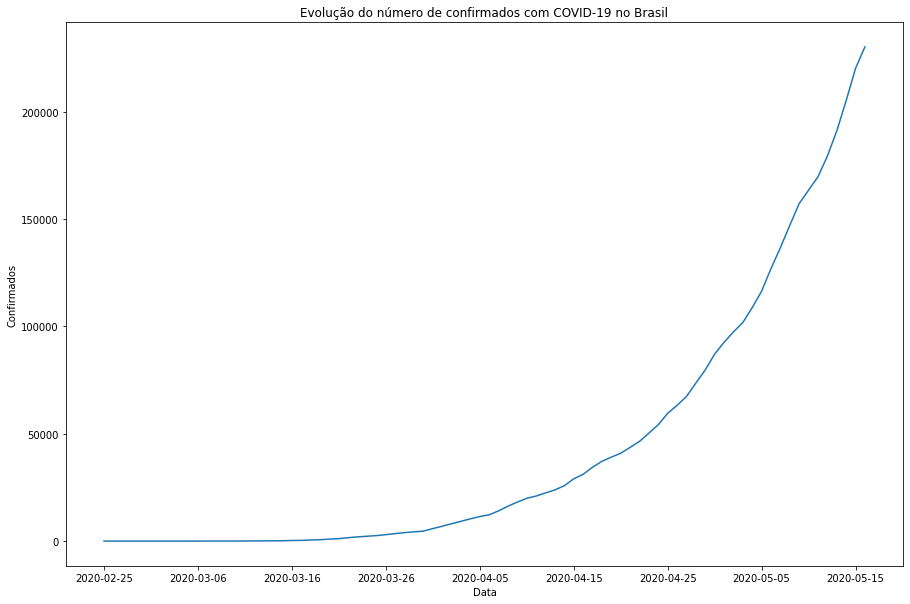

In [70]:
# state_df.groupby('date')['confirmed'].sum().plot()

# # figsize
# state_df.groupby('date')['confirmed'].sum().plot(figsize=(15,10))

# # y-axis
# state_df.groupby('date').sum().plot(figsize=(15,10), y='confirmed')

# # chart type
# state_df.groupby('date')['confirmed'].sum().plot(figsize=(15,10), kind='bar')

# title and labels
state_df.groupby('date')['confirmed'].sum().plot(figsize=(15,10), title='Evolução do número de confirmados com COVID-19 no Brasil')
plt.xlabel("Data")
plt.ylabel("Confirmados")
plt.show()

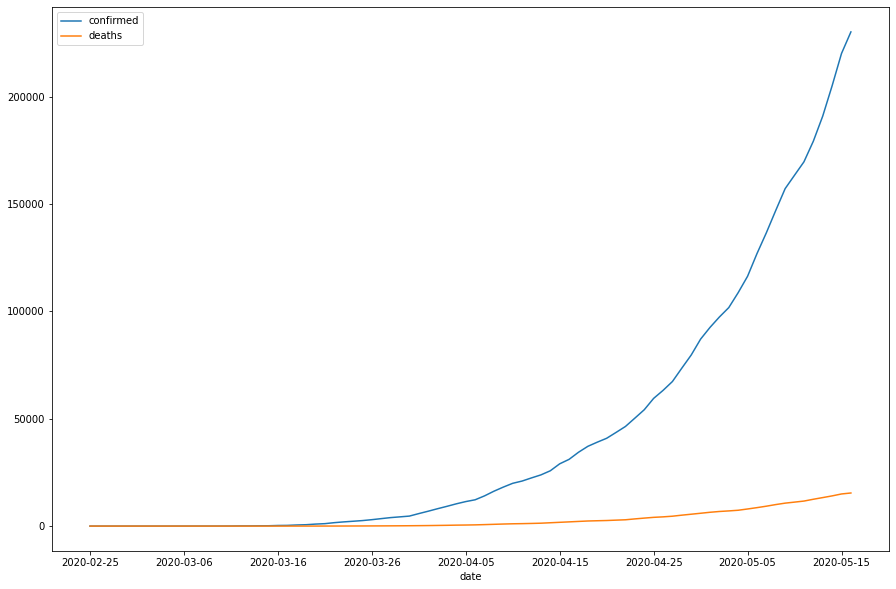

In [85]:
state_df.groupby('date')[['confirmed', 'deaths']].sum().plot(figsize=(15,10))

## Médias móveis

Um método de manipulação muito usado na visualização de dados é a média móvel, que consegue em calcular a média dos valores em uma janela de X anos, reduzindo o ruído dos gráficos e facilitando a visualização de tendências, por exemplo.

Para traçar o gráfico do número de confirmados por estado, precisamos usar o método [`pivot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) para reestruturar nosso dataset. Após isso, teremos um dataset com as datas como linhas, os estados como colunas e o número de confirmados naquele dia para aquele determinado estado como valor da célula.

Além de reorganizar nosso dataset, isso também garante que tenhamos o mesmo número de dias para cada um dos estados.

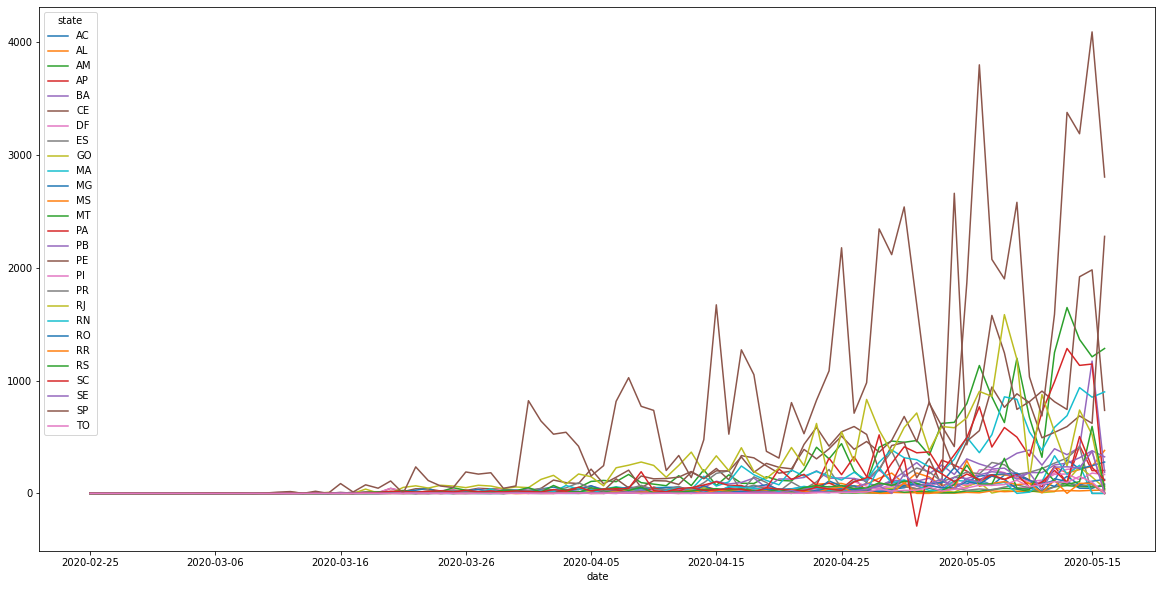

In [87]:
# state_df.pivot(values='new_confirmed', index='date', columns='state').fillna(0)

x = state_df.pivot(values='new_confirmed', index='date', columns='state').fillna(0)
x.plot(figsize=(20,10))

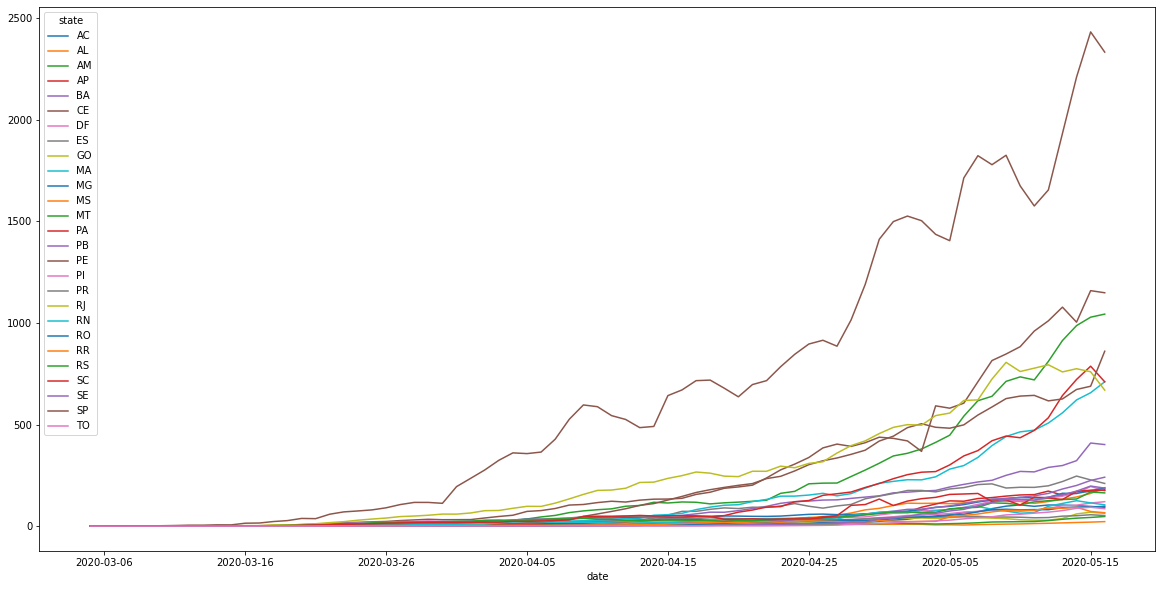

In [94]:
ma = state_df.pivot(values='new_confirmed', index='date', columns='state').fillna(0)
ma = ma.rolling(10).mean()
ma.plot(figsize=(20,10))

## BONUS: Evolução no mundo

Vamos analisar como anda a evolução do número de casos de COVID por dia pelo mundo e comparar com o Brasil. 
Você pode baixar o dataset [AQUI](https://covid.ourworldindata.org/data/ecdc/new_cases.csv).

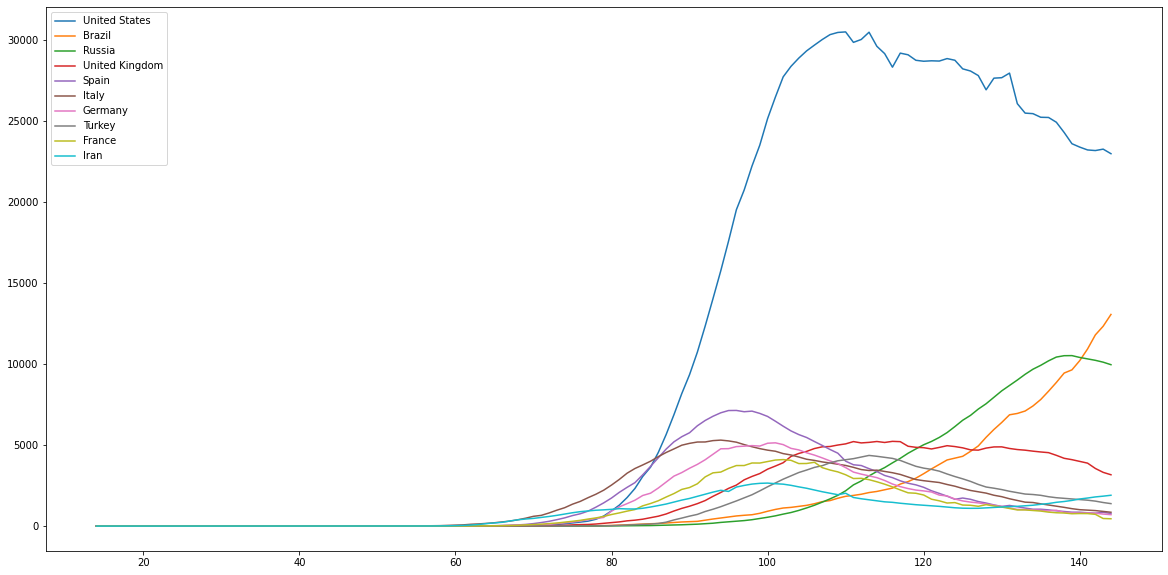

In [130]:

world_df = pd.read_csv("new_cases.csv")

# Getting the countries with most cases
countries = world_df.drop(['World'], axis=1).fillna(0).set_index('date').sum().sort_values(ascending=False).head(10).index.tolist()

world_df.fillna(0)[countries].rolling(15).mean().plot(figsize=(20,10))